##TASK: BULID A HOUSE PRICE PREDICTION MODEL

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [73]:
# Load the dataset
file_path = "/content/data (1).csv"
df = pd.read_csv(file_path)

In [78]:
# Step 1: Display Initial Dataset Information
print("Initial Dataset Info:")
df.info()
print(df.head())

Initial Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   float64
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   object 
 14  statezip       4600 non-null   object 
dtypes: float64(4), int64(9), object(2)
memory usage: 539.2+ KB
       price  bedrooms  bathrooms  sqft_living  sqft_lot  f

In [85]:
#Step 3: Data preprocessing
# Drop unnecessary columns
if {'date', 'street', 'country'}.issubset(df.columns):
    df = df.drop(columns=['date', 'street', 'country'])

In [86]:
# Encode categorical features
if 'city' in df.columns and 'statezip' in df.columns:
    label_enc_city = LabelEncoder()
    label_enc_statezip = LabelEncoder()
    df['city'] = label_enc_city.fit_transform(df['city'])
    df['statezip'] = label_enc_statezip.fit_transform(df['statezip'])

In [87]:
# Handle outliers using IQR
numerical_features = df.select_dtypes(include=['number']).columns.tolist()
if 'price' in numerical_features:
    Q1 = df[numerical_features].quantile(0.25)
    Q3 = df[numerical_features].quantile(0.75)
    IQR = Q3 - Q1
    df = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [88]:
# Standardize numerical features
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

<ipython-input-88-d212fc7593c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[numerical_features] = scaler.fit_transform(df[numerical_features])


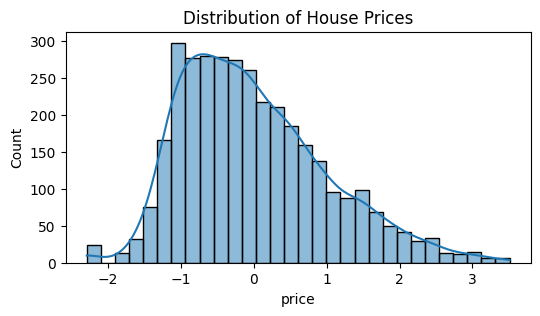

In [92]:
# Step 4: Exploratory Data Analysis (EDA)
plt.figure(figsize=(6,3))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of House Prices')
plt.show()


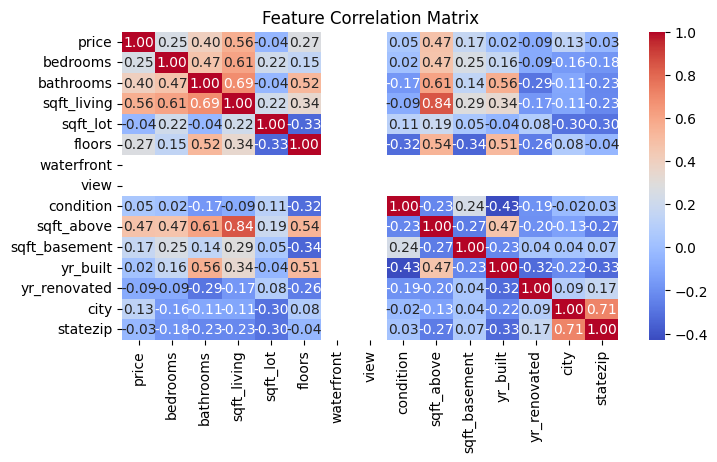

In [93]:
plt.figure(figsize=(8,4))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.show()


In [94]:
# Step 5: Model Building
X = df.drop(columns=['price'])
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Model 2: Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [101]:
# Step 6: Model Evaluation
rf_y_pred = rf_model.predict(X_test)
lr_y_pred = lr_model.predict(X_test)

# Random Forest Metrics
rf_mae = mean_absolute_error(y_test, rf_y_pred)
rf_mse = mean_squared_error(y_test, rf_y_pred)
rf_r2 = r2_score(y_test, rf_y_pred)

# Linear Regression Metrics
lr_mae = mean_absolute_error(y_test, lr_y_pred)
lr_mse = mean_squared_error(y_test, lr_y_pred)
lr_r2 = r2_score(y_test, lr_y_pred)

print("Random Forest Regressor Metrics:")
print(f"MAE: {rf_mae}")
print(f"MSE: {rf_mse}")
print(f"R² Score: {rf_r2}")

print("Linear Regression Metrics:")
print(f"MAE: {lr_mae}")
print(f"MSE: {lr_mse}")
print(f"R² Score: {lr_r2}")

Random Forest Regressor Metrics:
MAE: 0.37242739450977136
MSE: 0.27788840742857357
R² Score: 0.7209021725952097
Linear Regression Metrics:
MAE: 0.5658656422821472
MSE: 0.5176716764812812
R² Score: 0.48007532393355634
